##Install python libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##Load the Data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/10Acadamy/data/data.csv")

###Overview of the Data

In [ ]:
df.head()

TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory    ChannelId   Amount  Value  TransactionStartTime  \
0             airtime  ChannelId_3   1000.0   1000  2018-11-15T02:18:49Z   
1  financial_services  ChannelId_2    -20.0     20  2018-11-15T02:19:08Z   
2             airtime  ChannelId_3    500.0    500  2018-11-15T02:44:21Z   
3        utility_bill  ChannelId_3  20000.0  21800  2018-11-15T03:32:55Z   
4  financial_services  ChannelId_2   -644.0    644  2018-11-15T03:34:21Z   

   PricingStrategy  FraudResult  
0                2            0  
1                2            0  
2                2            0  
3                2            0  
4                2            0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

###Summary stats for numerical features

In [ ]:
df.describe()

CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000

### Unique values per column

In [ ]:
df.nunique()

TransactionId           95662
BatchId                 94809
AccountId                3633
SubscriptionId           3627
CustomerId               3742
CurrencyCode                1
CountryCode                 1
ProviderId                  6
ProductId                  23
ProductCategory             9
ChannelId                   4
Amount                   1676
Value                    1517
TransactionStartTime    94556
PricingStrategy             4
FraudResult                 2
dtype: int64

## Summary Statistics

In [ ]:
df["Amount"].describe()

count    9.566200e+04
mean     6.717846e+03
std      1.233068e+05
min     -1.000000e+06
25%     -5.000000e+01
50%      1.000000e+03
75%      2.800000e+03
max      9.880000e+06
Name: Amount, dtype: float64

##Distribution of Numerical Features

###Plot histograms/boxplots for Amount

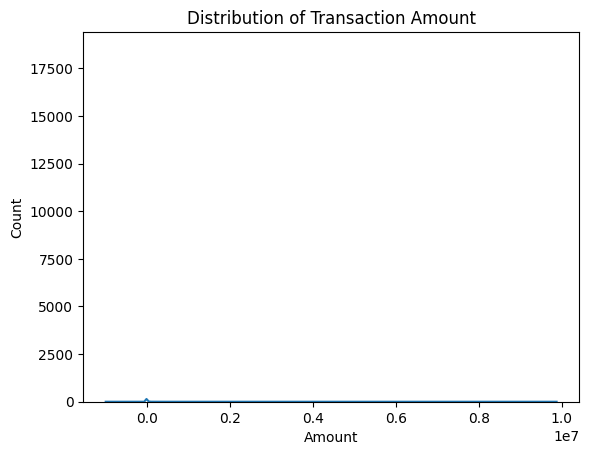

In [ ]:
sns.histplot(df["Amount"], kde=True)
plt.title("Distribution of Transaction Amount")
plt.show()

## Distribution of Catagorical Features

<Axes: xlabel='ProductCategory'>

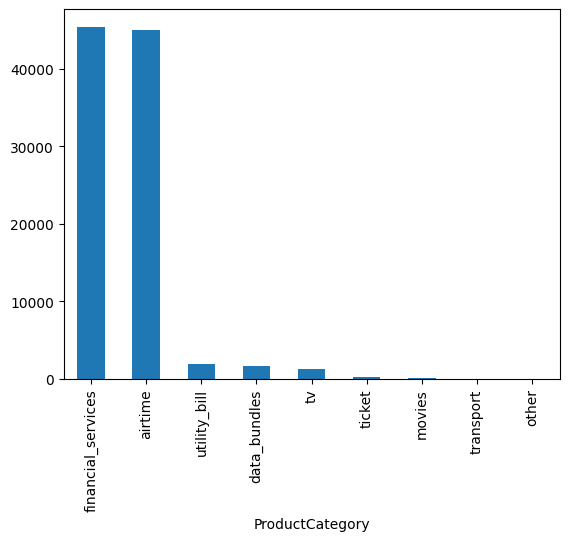

In [ ]:
df["ProductCategory"].value_counts().plot(kind="bar")

<Axes: xlabel='ChannelId'>

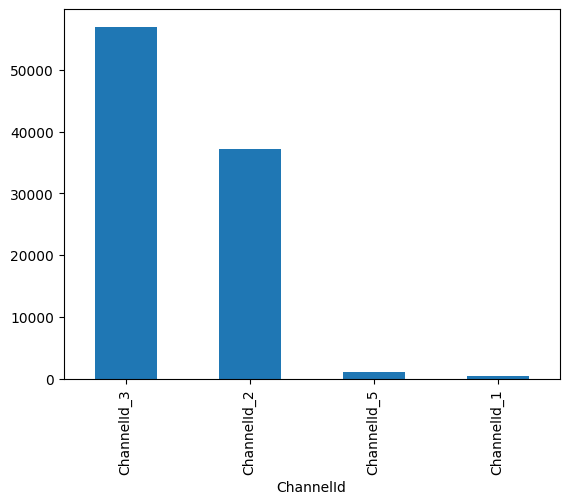

In [ ]:
df["ChannelId"].value_counts().plot(kind="bar")

##Correlation Analysis

<Axes: >

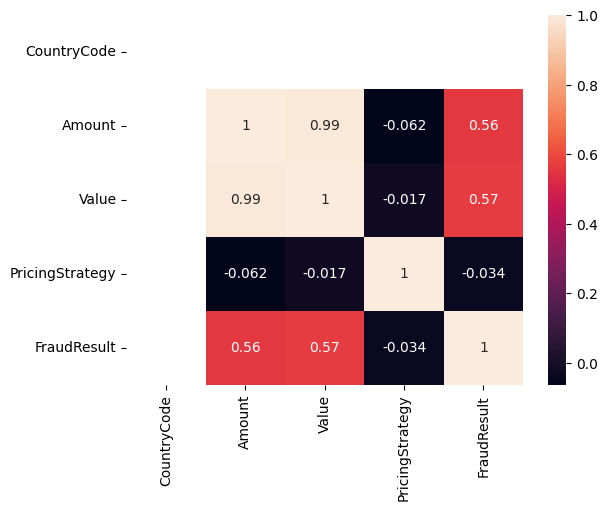

In [ ]:
corr_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr_matrix, annot=True)

##Missing Values

In [ ]:
df.isnull().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

<Axes: >

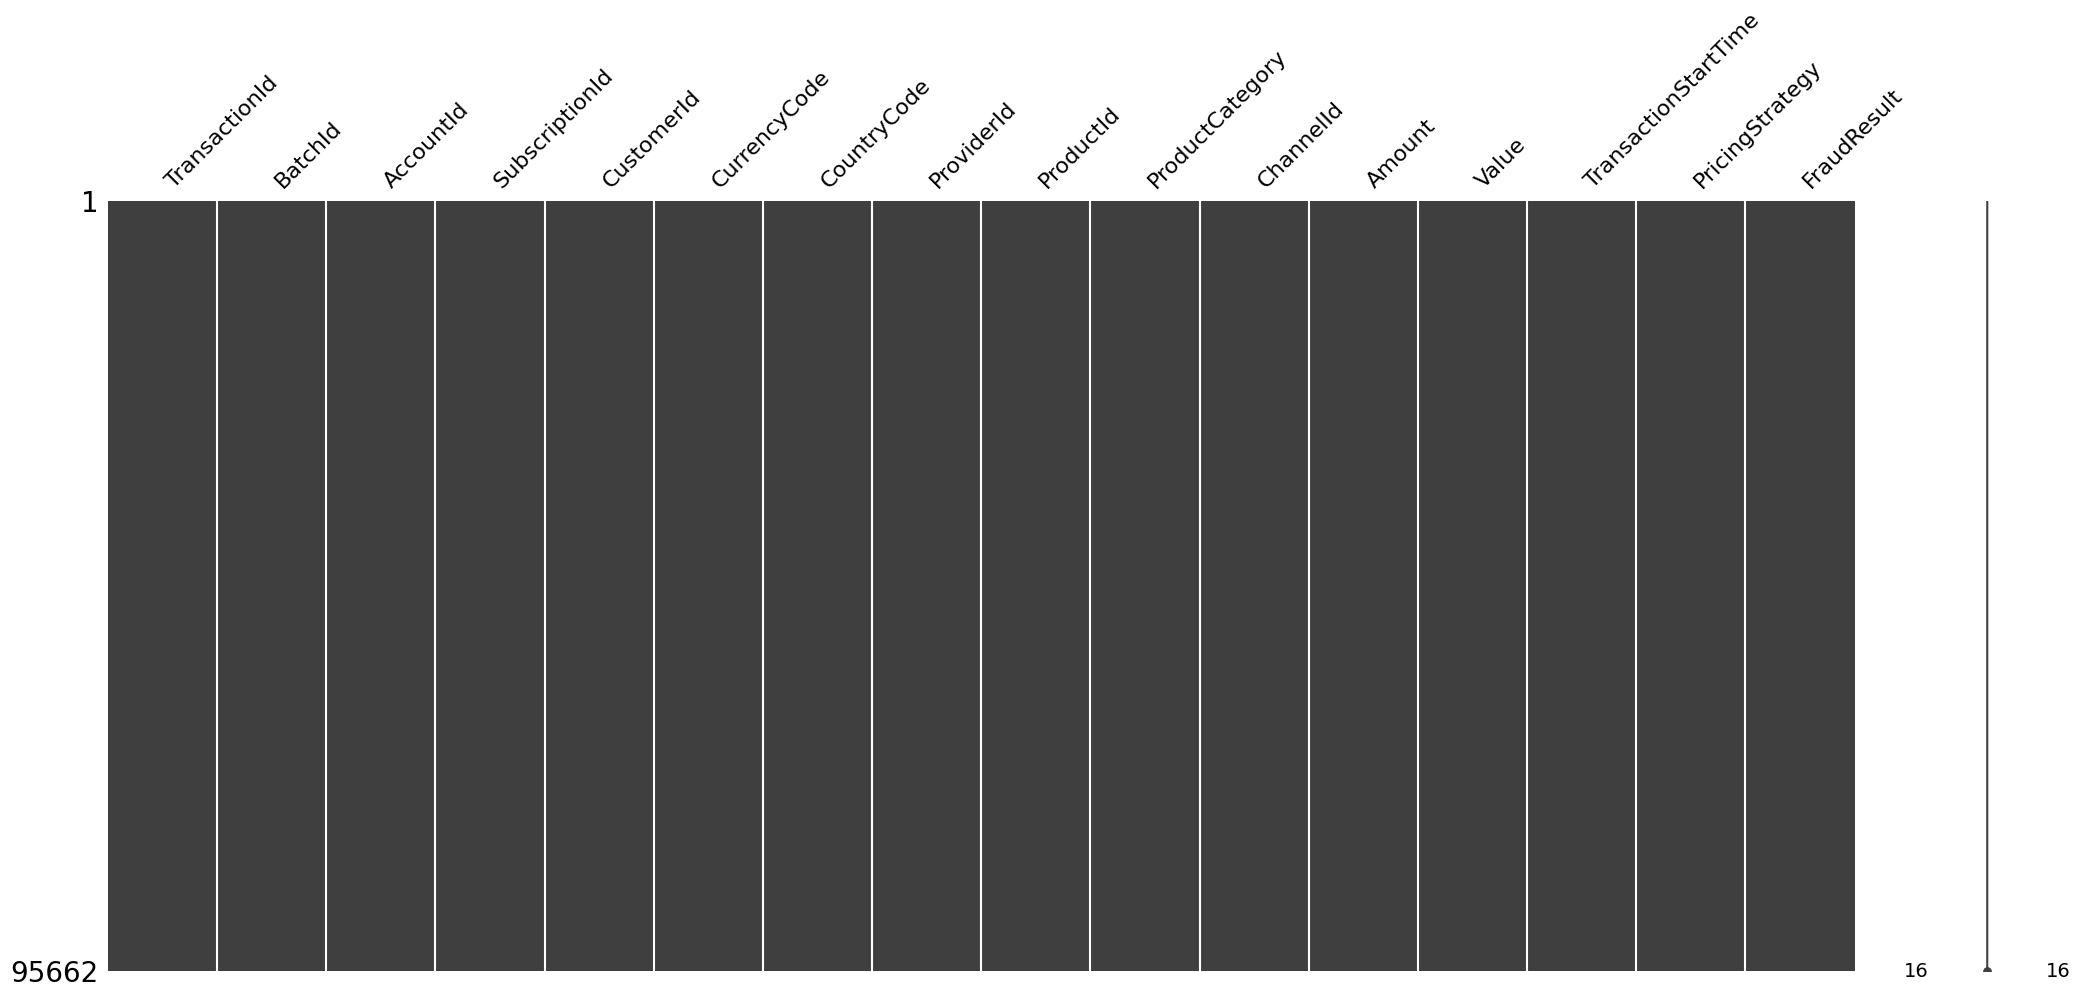

In [ ]:
import missingno as msno
msno.matrix(df)

##Outlier Detection

<Axes: ylabel='Amount'>

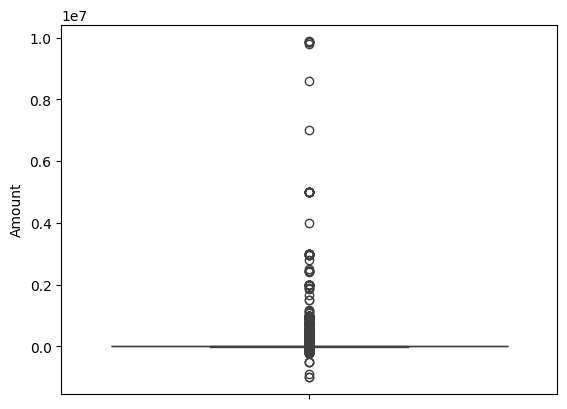

In [ ]:
sns.boxplot(df["Amount"])

## Datetime Feature Exploration

<Axes: xlabel='Hour', ylabel='count'>

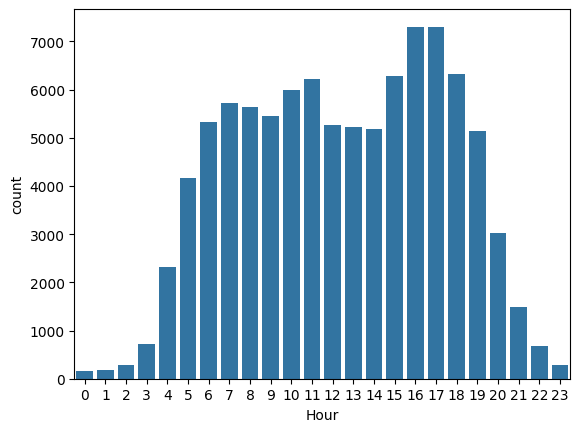

In [21]:
df["TransactionStartTime"] = pd.to_datetime(df['TransactionStartTime'])
df['Hour'] = df['TransactionStartTime'].dt.hour
sns.countplot(x='Hour' , data=df)


<Axes: xlabel='Day', ylabel='count'>

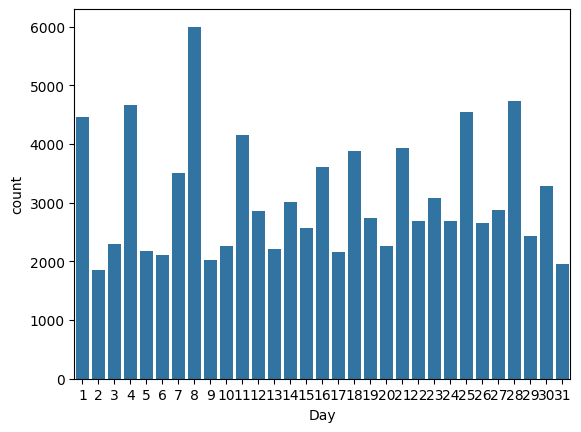

In [22]:
df['Day'] = df['TransactionStartTime'].dt.day
sns.countplot(x='Day', data=df)

<Axes: xlabel='Month', ylabel='count'>

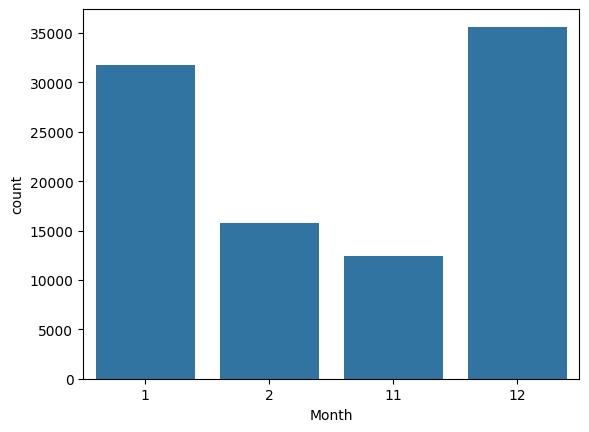

In [24]:
df['Month'] = df['TransactionStartTime'].dt.month
sns.countplot(x='Month', data=df)

<Axes: xlabel='Year', ylabel='count'>

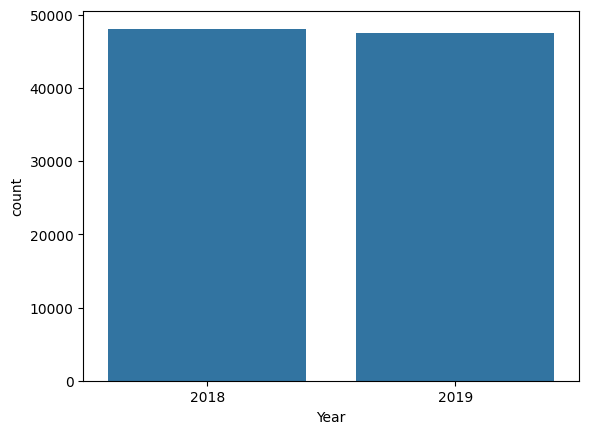

In [25]:
df['Year'] = df['TransactionStartTime'].dt.year
sns.countplot(x='Year', data=df)

##Customer-Level Summary

array([[<Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'mean'}>],
       [<Axes: title={'center': 'sum'}>, <Axes: >]], dtype=object)

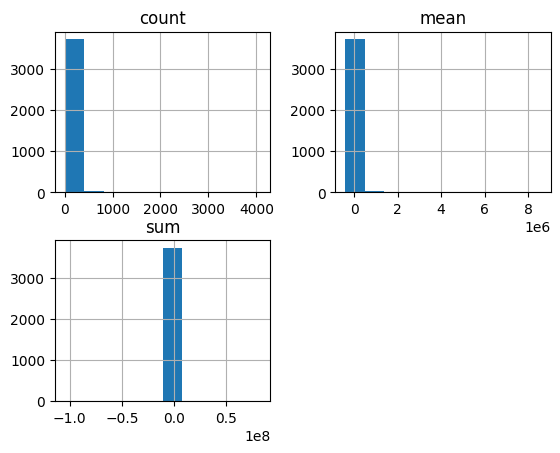

In [26]:
df.groupby("CustomerId")['Amount'].agg(['count', 'mean', 'sum']).hist()

##Exploring FraudResult

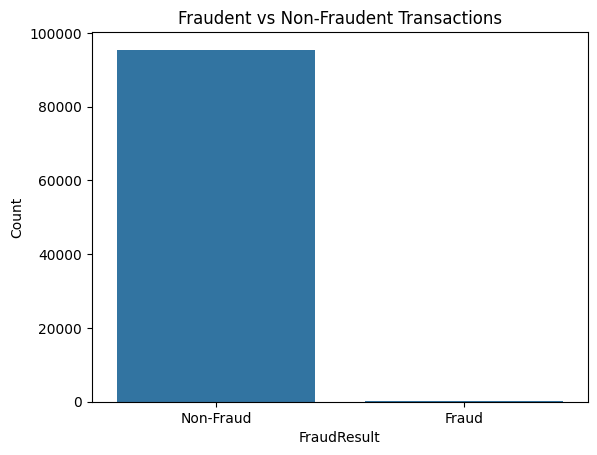

FraudResult
0    99.798248
1     0.201752
Name: count, dtype: float64


In [27]:
fraud_counts = df['FraudResult'].value_counts()

sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title('Fraudent vs Non-Fraudent Transactions')
plt.xticks([0,1], ['Non-Fraud', 'Fraud'])
plt.ylabel('Count')
plt.show()

print(fraud_counts / len(df) * 100)

###Fraud vs Amount
Are Fraud transactions associated with higher or lower amounts

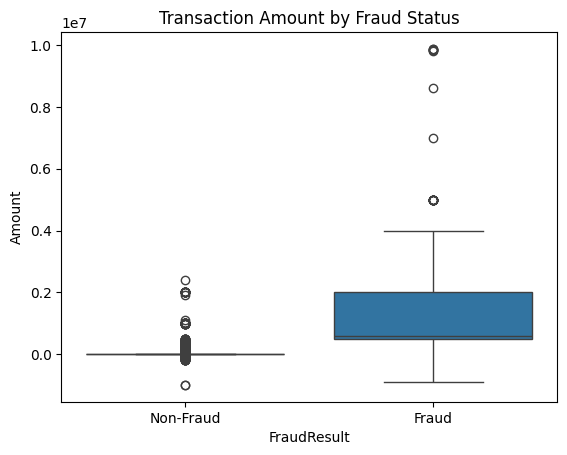

In [28]:
sns.boxplot(x='FraudResult', y='Amount', data = df)
plt.title('Transaction Amount by Fraud Status')
plt.xticks([0,1], ['Non-Fraud', 'Fraud'])
plt.show()

##Save processed data

In [29]:
df.to_csv("/content/drive/MyDrive/10Acadamy/data/cleaned_data.csv", index=False)